In [ ]:
# Importing various Libraries for making of the CNN Machine Learning Model in Python 

In [1]:
!pip install tensorflow matplotlib
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pathlib

In [ ]:
#Linking the Dataset for the CNN Model 

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
#Specifying the batch size along with the Image Height and Image width as 180 pixels

In [ ]:
#Also splitting the entire dataset into Training ,Test , Validation datasets

In [31]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
#Note dowm the class names of the flowers based on which this CNN model is made

In [32]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
#Plotting some of the Photos of the flowers in order for checking thecode if it worls properly

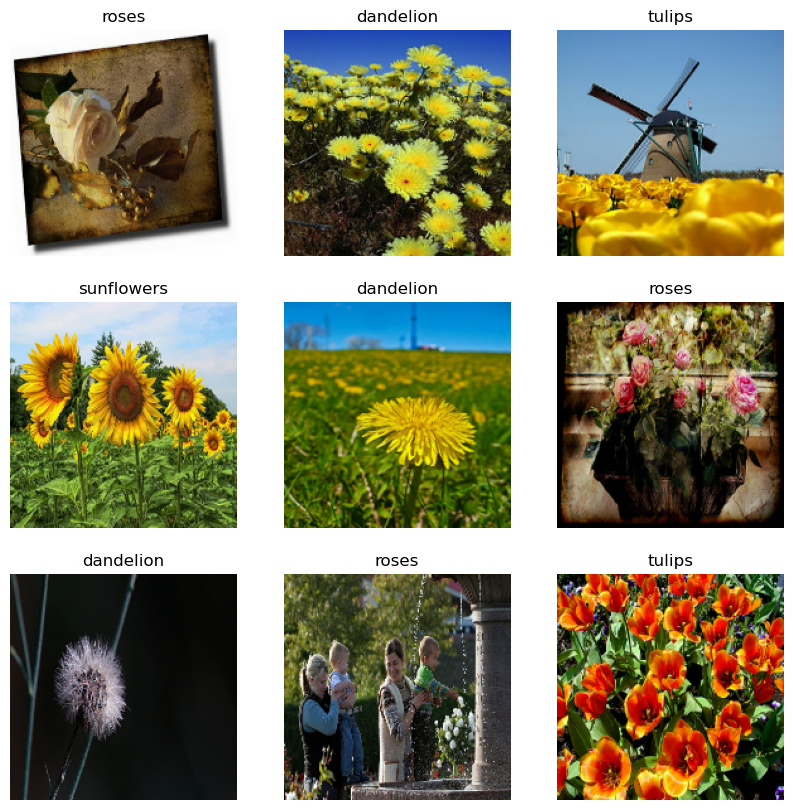

In [33]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
#Autotuning the Dataset and loading it into the cache for faster extarcting of the data for the CNN model

In [34]:
AUTOTUNE = tf.data.AUTOTUNE

In [35]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
num_classes = len(class_names)

In [ ]:
#Implementation of the Data Augmentation Technique for this model in order to reduce Overfitting and Underfitting

In [36]:
 data_augmentation = Sequential ([
     layers.RandomFlip("horizontal", input_shape = (img_height, img_width, 3)),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.1)])

In [ ]:
#Plotting the Augmented images for reviewing the proper implementation of the Data Augmentation Technique

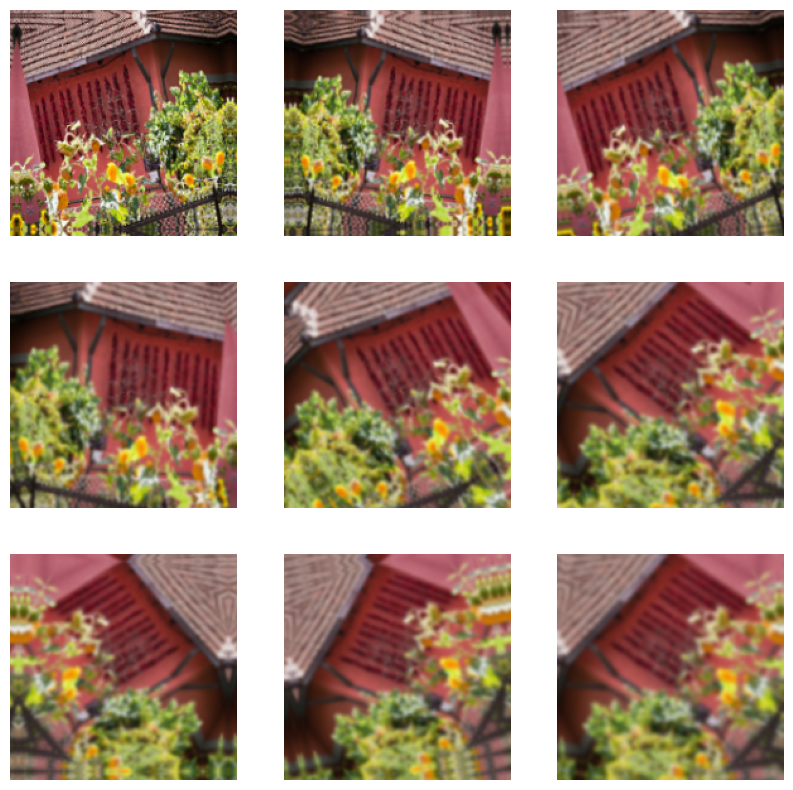

In [37]:
i=0
plt.figure(figsize =(10,10))

for images,labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3,i+1) 
        plt.imshow(images[0].numpy().astype('uint8')) 
        plt.axis('off')

In [ ]:
#Creation of the CNN Sequential Model in python ng various layers including input, Output and hidden Layers toofor proper training and validation

In [38]:
model = models.Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
#Summary of the All over CNN Sequential Machine Learning Python Model

In [52]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,942,865 (76.08 MB)

 Trainable params: 6,647,621 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,295,244 (50.72 MB)

In [ ]:
#Compiling this CNN model for reviewing the previous written code and all over efforts before the Training 

In [39]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
#Training Phase: Training the CNN Sequential Model with the Training Dataset and validating it with Validation Dataset

In [40]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.3520 - loss: 1.4918 - val_accuracy: 0.5232 - val_loss: 1.1424
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.5770 - loss: 1.0466 - val_accuracy: 0.6090 - val_loss: 1.0029
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.6333 - loss: 0.9389 - val_accuracy: 0.6744 - val_loss: 0.8373
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.6761 - loss: 0.8471 - val_accuracy: 0.6526 - val_loss: 0.8974
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.6995 - loss: 0.7926 - val_accuracy: 0.6417 - val_loss: 0.8833
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6841 - loss: 0.7765 - val_accuracy: 0.7016 - val_loss: 0.7551
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.7247 - loss: 0.7158 - val_accuracy: 0.7030 - val_loss: 0.7523
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 92s 997ms/step - accuracy: 0.7272 - loss: 0.6998 - val_accuracy: 0.7153 - val

In [ ]:
#Recording the History of the Accuracy and the Validation Accuracy along with the History of the Loss and the Validation Loss

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


In [ ]:
#Plotting the Graph of Training and Validation Accuracy along with the Training and Validation Loss

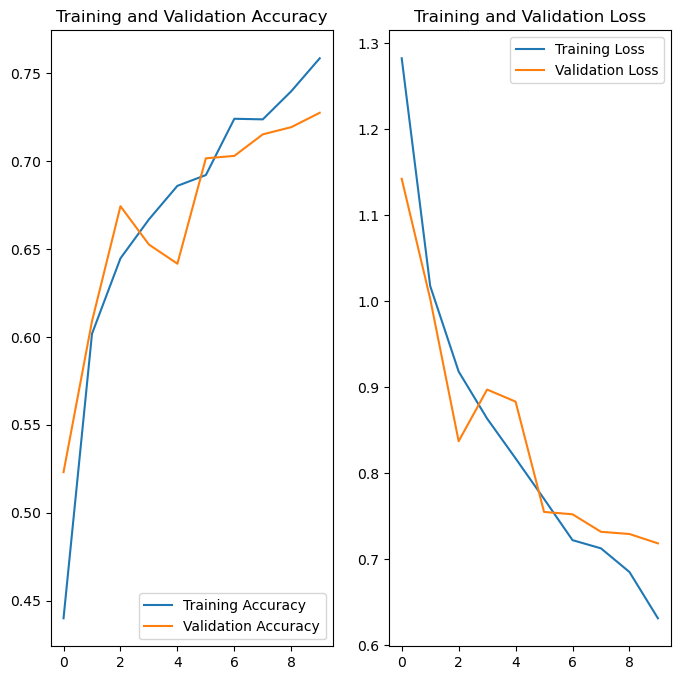

In [42]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Now time for evaluating the Model on the testing Dataset

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rescaled = ImageDataGenerator(1./255)
test_fed = rescaled.flow_from_directory('test_set', target_size = (180,180), batch_size = 28, class_mode = 'sparse')

Found 128 images belonging to 5 classes.


In [ ]:
#Evaluating the model based on its Training

In [44]:
acc = model.evaluate(test_fed, steps = len(test_fed), verbose = 2)
print('%.2f'%(acc[1]*100))

5/5 - 2s - 386ms/step - accuracy: 0.7266 - loss: 0.7402
72.66


In [ ]:
#Now plotting the Graph between Accuracy vs Epoch and Loss vs Epoch

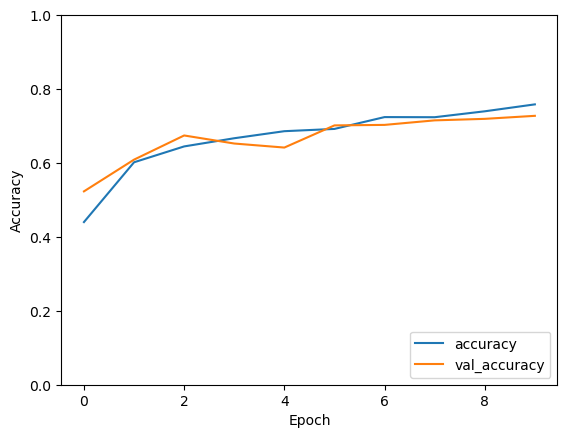

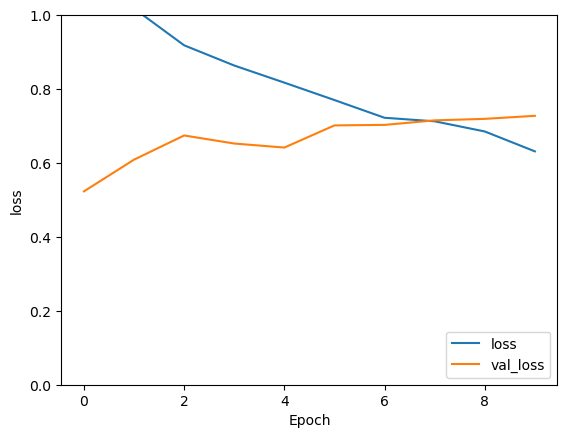

In [45]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Now defining a function for passing of the image and predicting it through testing with the CNN Model for its belonging Category

In [46]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + class_names[np.argmax(result)] + ' with a score of ' + str(np.max(result)*100)
    return outcome

In [ ]:
#Now Passing a test Image for testing if the Model works Completely Fine or not

In [51]:
classify_images('test_set/tulips/11746367_d23a35b085_n.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


'The Image belongs to tulips with a score of 93.91759634017944'

In [ ]:
#Now saving The model 

In [53]:
model.save('Flower_classifier_model.keras')

In [ ]:
###########################################################################################################################################

In [ ]:
#NOTE REGARDING THIS CNN MODEL: THIS IS THE FIRST MODEL CREATED BY SUCHI SUBHRA JANA AND SUBHRONEEL SARKAR.
#THE MODEL IS AT ITS PRIMARY STAGE OF TESTING AND STILL EVEN NEEDS CERTAIN IMPROVEMENTS. FOR WHICH SUGGESTIONS AND HELP ARE WLWAYS WELCOME. 
#PLEASE CONTRIBUTE AND HELP IN IMPROVING THIS ODEL EVEN MUCH MORE.
#THANKING YOU,
#YOURS FAITHFULLY,
#CREATORS OF THIS MODEL:
#SUCHI SUBHRA JANA
#SUBHRONEEL SARKAR
